In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the dataset 
df = pd.read_csv('/kaggle/input/google-play-store-reviews/reviews.csv')

In [3]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,2020-10-27 14:03:28,"Please note that from checking our records, yo...",2020-10-27 15:05:52,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,2020-10-27 08:18:40,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,2020-10-26 13:28:07,What do you find troublesome about the update?...,2020-10-26 14:58:29,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,NaN,NaN,newest,com.anydo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [5]:
df.describe()

,score,thumbsUpCount
count,12495.000000,12495.000000
mean,3.094198,3.047459
std,1.457693,14.303903
min,1.000000,0.000000
25%,2.000000,0.000000
50%,3.000000,0.000000
75%,4.000000,1.000000
max,5.000000,397.000000


In [6]:
df= df.drop(['replyContent','repliedAt'],axis=1)

<Axes: >

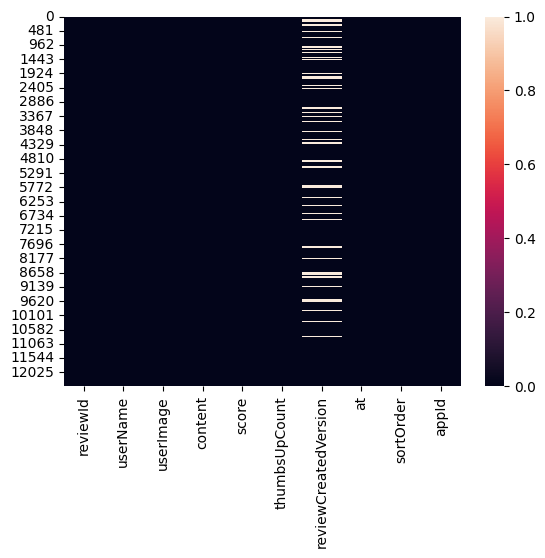

In [7]:
sns.heatmap(df.isnull())

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
sortOrder               0
appId                   0
dtype: int64

In [10]:
df.shape

(10333, 10)

In [11]:
df_new=df[(df.score==1) | (df.score==5)]

In [12]:
df_new.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,newest,com.anydo
5,gp:AOqpTOEvElPsBa6k8rLDmk-WrEoJea98KUrIGYWodJe...,Jon Clemens,https://play-lh.googleusercontent.com/-q6L1fx0...,It has changed how I viewed my different lists...,1,1,5.6.0.7,2020-10-26 05:04:20,newest,com.anydo
6,gp:AOqpTOGHb-APKKMNFyL1OwuGq1AGW6bQp5aYYxSHvJx...,Gale W,https://play-lh.googleusercontent.com/a-/AOh14...,I'm only looking for a grocery list app but ev...,1,0,5.6.0.6,2020-10-25 23:40:46,newest,com.anydo
7,gp:AOqpTOEcxvv_c0CK3G5tHjxXsGSjbzD65OQ3og02p-q...,No One,https://play-lh.googleusercontent.com/a-/AOh14...,"Reset my free trial, new phone I'd like to see...",1,0,5.5.0.8,2020-10-25 19:18:13,newest,com.anydo


In [13]:
df_new.shape

(4383, 10)

In [14]:
df_new['length']= df_new['content'].apply(lambda x : len(x) )

/tmp/ipykernel_19/1274885061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['length']= df_new['content'].apply(lambda x : len(x) )


In [15]:
df_new

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,sortOrder,appId,length
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,2020-10-27 21:24:41,newest,com.anydo,29
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,2020-10-26 06:10:50,newest,com.anydo,19
5,gp:AOqpTOEvElPsBa6k8rLDmk-WrEoJea98KUrIGYWodJe...,Jon Clemens,https://play-lh.googleusercontent.com/-q6L1fx0...,It has changed how I viewed my different lists...,1,1,5.6.0.7,2020-10-26 05:04:20,newest,com.anydo,111
6,gp:AOqpTOGHb-APKKMNFyL1OwuGq1AGW6bQp5aYYxSHvJx...,Gale W,https://play-lh.googleusercontent.com/a-/AOh14...,I'm only looking for a grocery list app but ev...,1,0,5.6.0.6,2020-10-25 23:40:46,newest,com.anydo,476
7,gp:AOqpTOEcxvv_c0CK3G5tHjxXsGSjbzD65OQ3og02p-q...,No One,https://play-lh.googleusercontent.com/a-/AOh14...,"Reset my free trial, new phone I'd like to see...",1,0,5.5.0.8,2020-10-25 19:18:13,newest,com.anydo,62
...,...,...,...,...,...,...,...,...,...,...,...
12489,gp:AOqpTOE0ZIV4Bklvw8ho4SYW3rTe-z18AhfK0JtR5Dd...,Mind Engineering,https://play-lh.googleusercontent.com/a-/AOh14...,its ok But we can not undestad repeated task s...,5,0,4.5.4,2019-01-07 20:20:35,newest,com.appxy.planner,52
12490,gp:AOqpTOEQPqib7pb6vFyjMY9JEfsMs_u8WCdqg6mbcar...,Mildred Olima,https://play-lh.googleusercontent.com/a-/AOh14...,"I really like the planner, it helps me achieve...",5,0,4.5.4,2018-12-21 00:13:09,newest,com.appxy.planner,122
12492,gp:AOqpTOFEn5UgYYggqiHKauDJVLLN8-16nk1AfZbEhkj...,amirbadang,https://play-lh.googleusercontent.com/-CM2FcrU...,Very useful apps. You must try it,5,0,4.5.4,2018-12-11 15:49:43,newest,com.appxy.planner,33
12493,gp:AOqpTOHOH6YdYLR91qZdYpeIVkMI-LeAE0EwYgrctid...,Emma Stebbins,https://play-lh.googleusercontent.com/-oCj6g6k...,Would pay for this if there were even more add...,5,0,4.5.4,2018-12-06 04:59:26,newest,com.appxy.planner,128


In [16]:
df_new = pd.DataFrame(data=df_new,columns=['content','length','score'])

In [17]:
df_new.head()

,content,length,score
0,I cannot open the app anymore,29,1
4,Dan Birthday Oct 28,19,1
5,It has changed how I viewed my different lists...,111,1
6,I'm only looking for a grocery list app but ev...,476,1
7,"Reset my free trial, new phone I'd like to see...",62,1


In [18]:
import string

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
df_new['nopunc'] = df_new['content'].apply(lambda x: [a for a in x if a not in string.punctuation])

In [21]:
df_new = pd.DataFrame(data=df_new,columns=['nopunc','length','score'])

In [22]:
df_new['nopunc'] = df_new['nopunc'].apply(''.join)

In [23]:
df_new

,nopunc,length,score
0,I cannot open the app anymore,29,1
4,Dan Birthday Oct 28,19,1
5,It has changed how I viewed my different lists...,111,1
6,Im only looking for a grocery list app but eve...,476,1
7,Reset my free trial new phone Id like to see i...,62,1
...,...,...,...
12489,its ok But we can not undestad repeated task s...,52,5
12490,I really like the planner it helps me achieve ...,122,5
12492,Very useful apps You must try it,33,5
12493,Would pay for this if there were even more add...,128,5


In [24]:
X=df_new['nopunc']
y=df_new['score']

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [26]:
X= cv.fit_transform(X)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [29]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [30]:
nb.fit(X_train,y_train)

MultinomialNB()

In [31]:
pred = nb.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.88      0.88      0.88       501
           5       0.93      0.93      0.93       814

    accuracy                           0.91      1315
   macro avg       0.90      0.91      0.90      1315
weighted avg       0.91      0.91      0.91      1315



In [34]:
from sklearn.feature_extraction.text import  TfidfTransformer

In [35]:
from sklearn.pipeline import Pipeline

In [36]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [37]:
X=df_new['nopunc']
y=df_new['score']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [38]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [39]:
y_pred = pipeline.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.91      0.86      0.88       501
           5       0.91      0.94      0.93       814

    accuracy                           0.91      1315
   macro avg       0.91      0.90      0.90      1315
weighted avg       0.91      0.91      0.91      1315

